    type  fixed acidity  volatile acidity  citric acid  residual sugar  \
0  white            7.0              0.27         0.36            20.7   
1  white            6.3              0.30         0.34             1.6   
2  white            8.1              0.28         0.40             6.9   
3  white            7.2              0.23         0.32             8.5   
4  white            7.2              0.23         0.32             8.5   

   chlorides  free sulfur dioxide  total sulfur dioxide  density    pH  \
0      0.045                 45.0                 170.0   1.0010  3.00   
1      0.049                 14.0                 132.0   0.9940  3.30   
2      0.050                 30.0                  97.0   0.9951  3.26   
3      0.058                 47.0                 186.0   0.9956  3.19   
4      0.058                 47.0                 186.0   0.9956  3.19   

   sulphates  alcohol  quality  
0       0.45      8.8        6  
1       0.49      9.5        6  
2       0.4

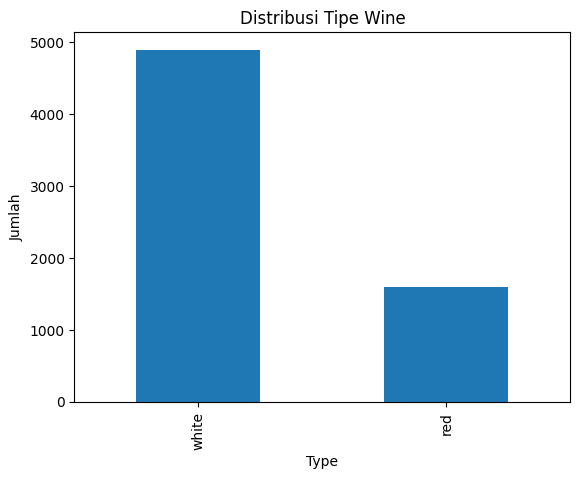

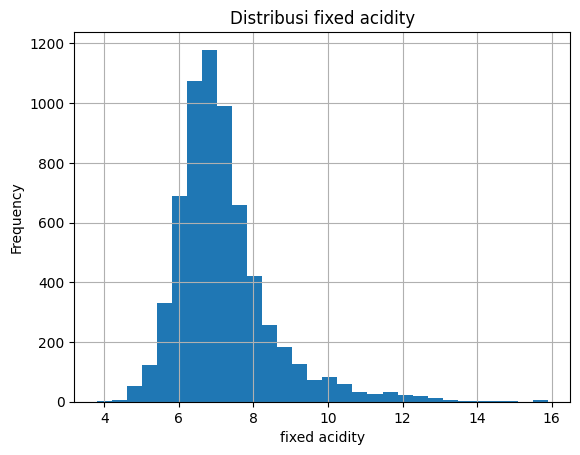

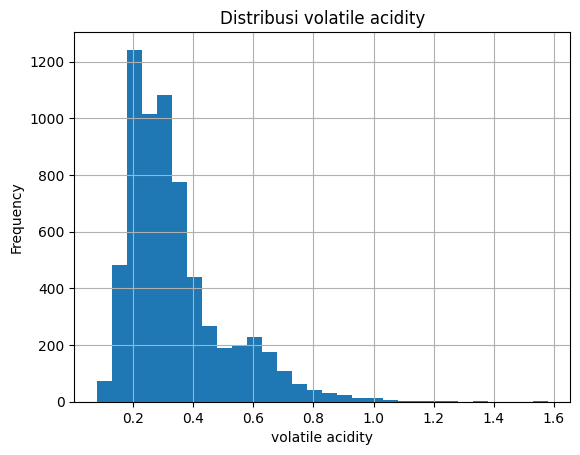

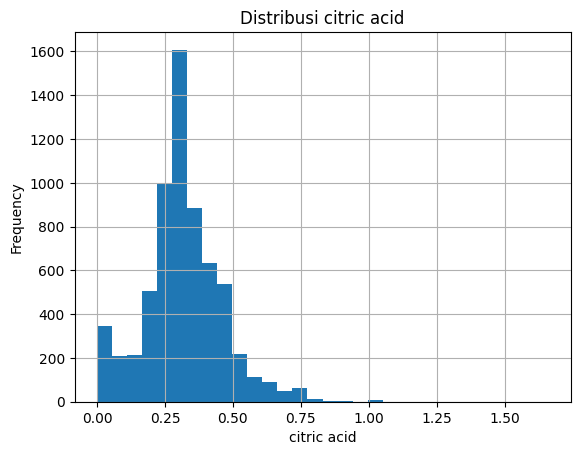

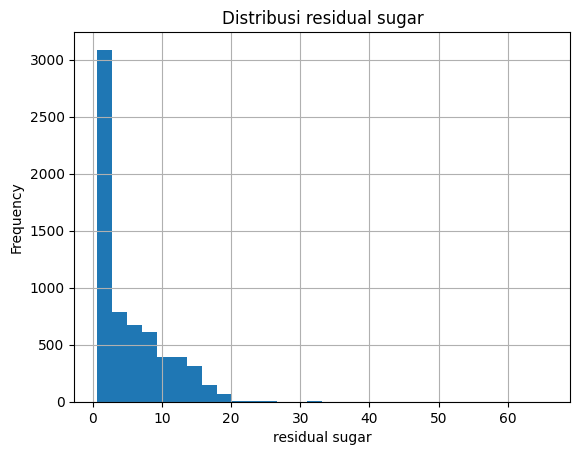

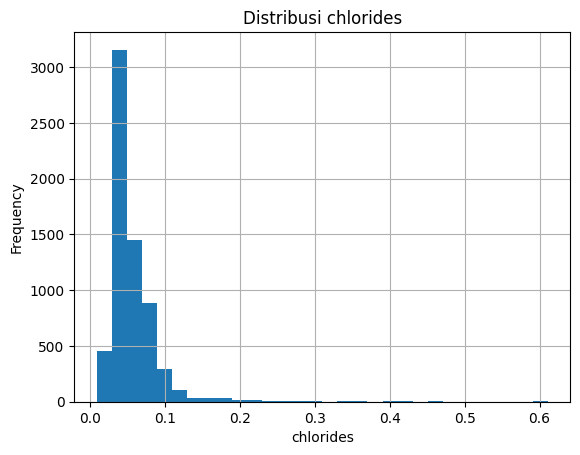

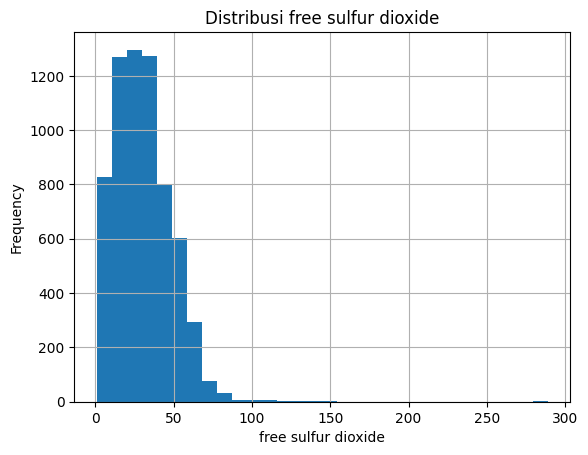

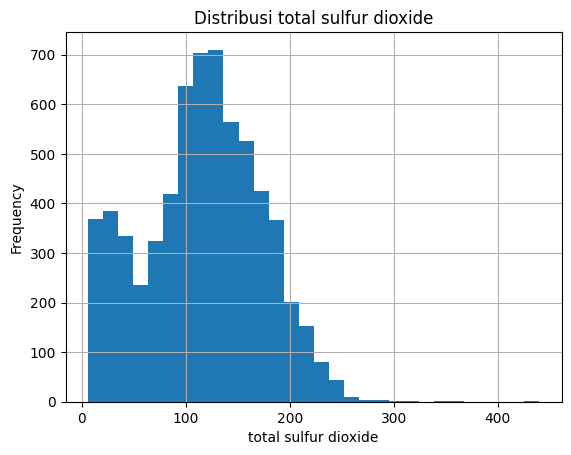

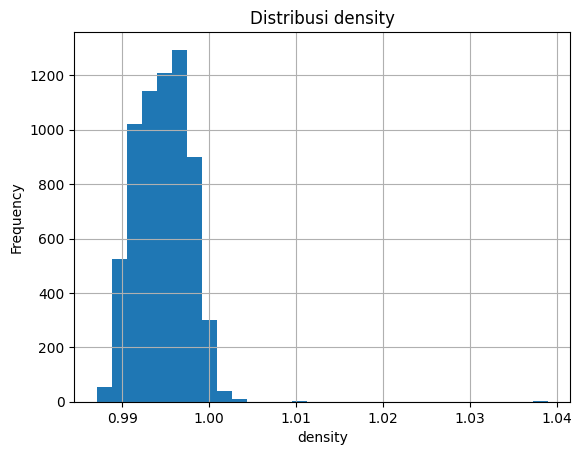

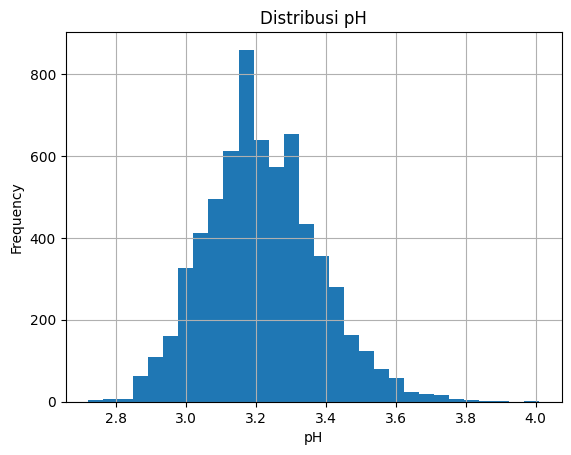

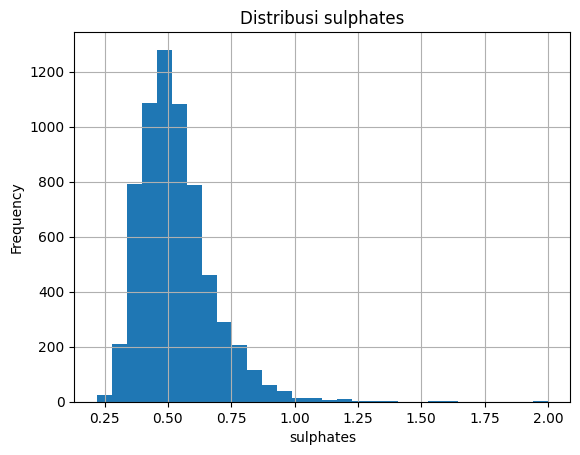

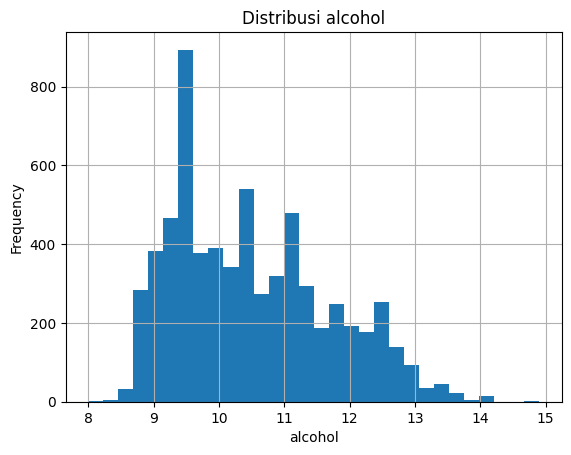

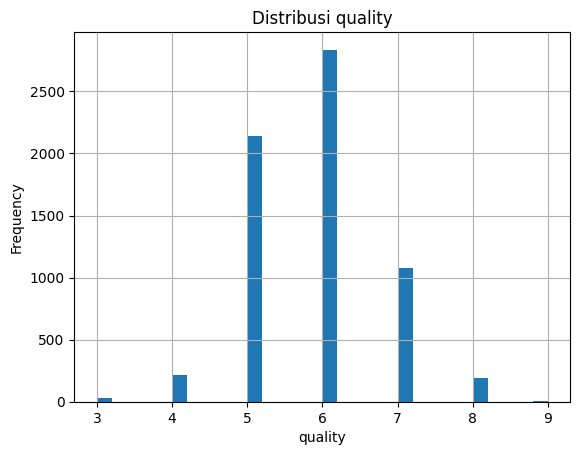

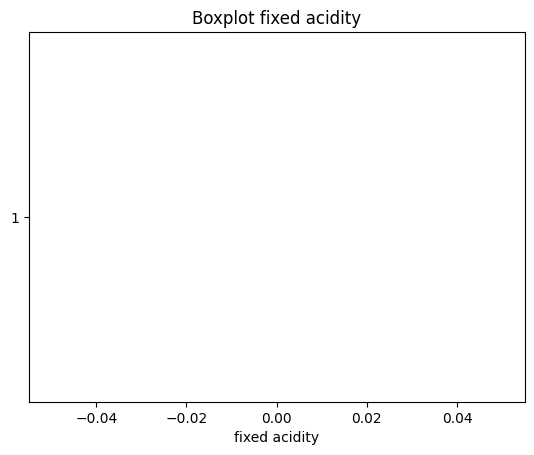

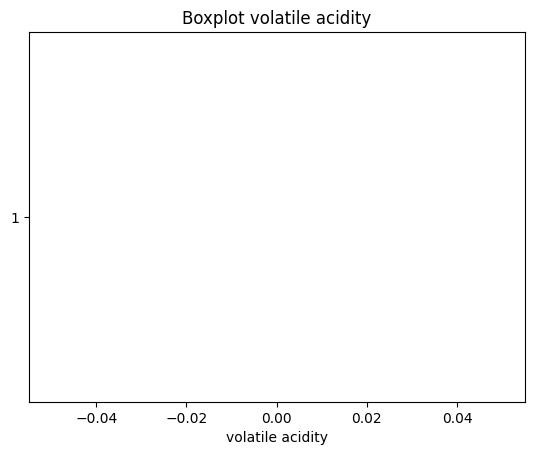

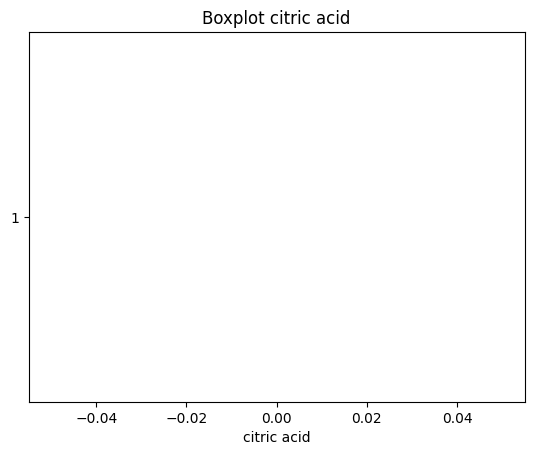

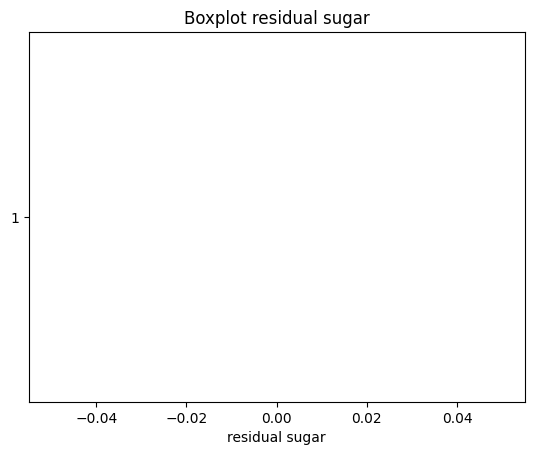

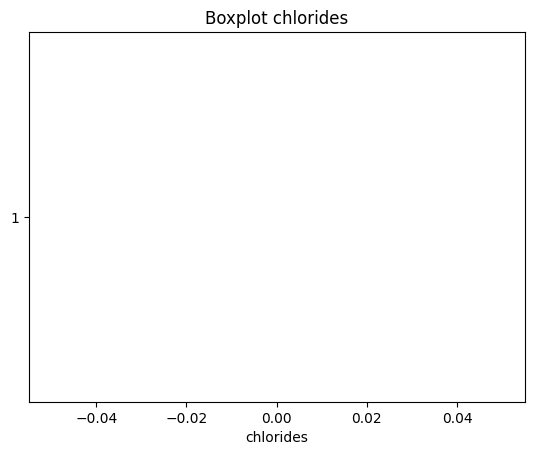

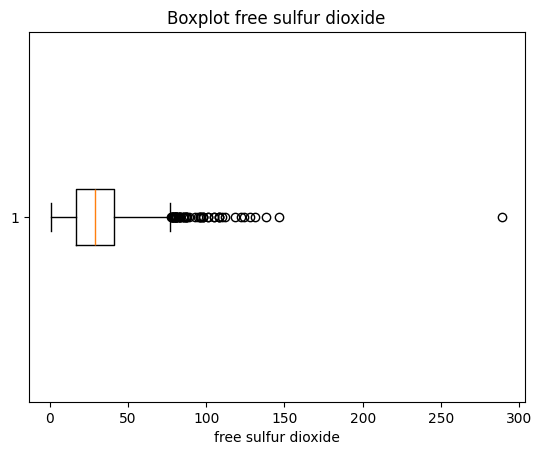

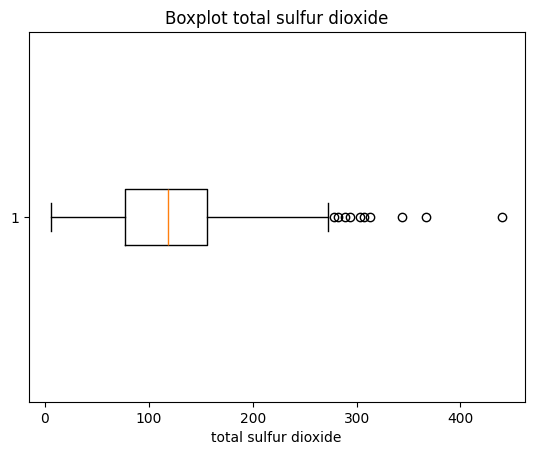

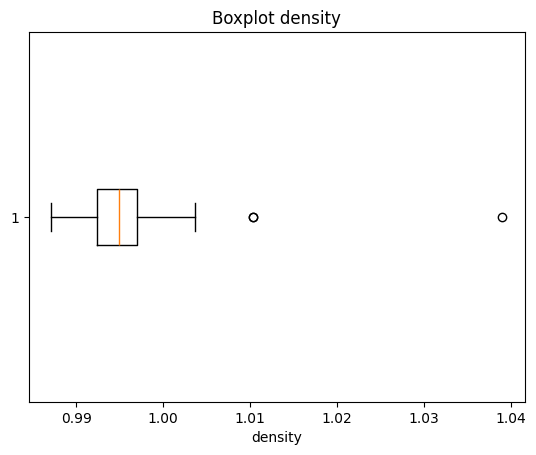

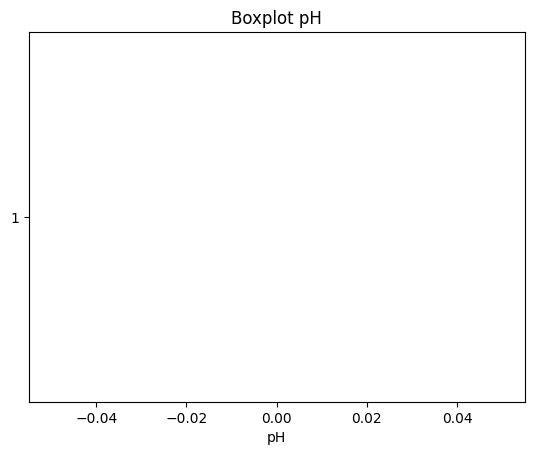

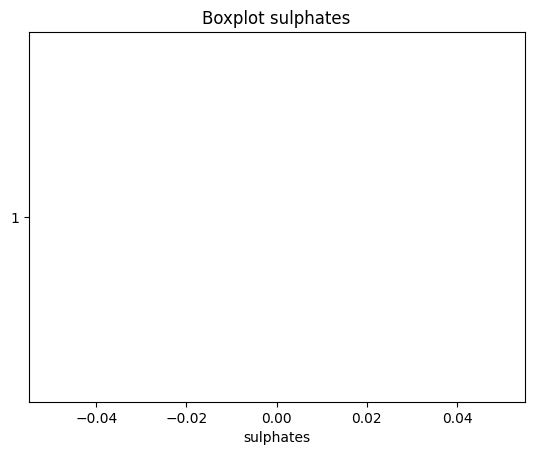

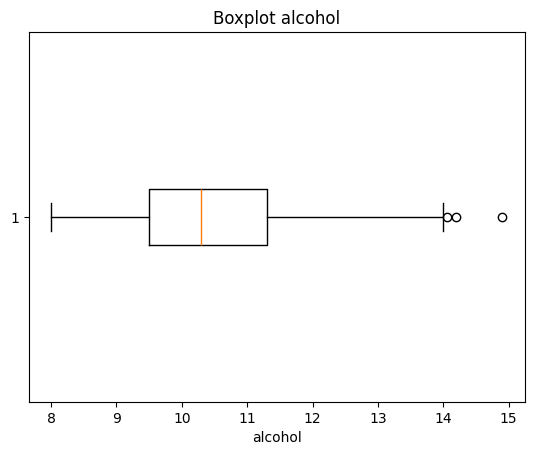

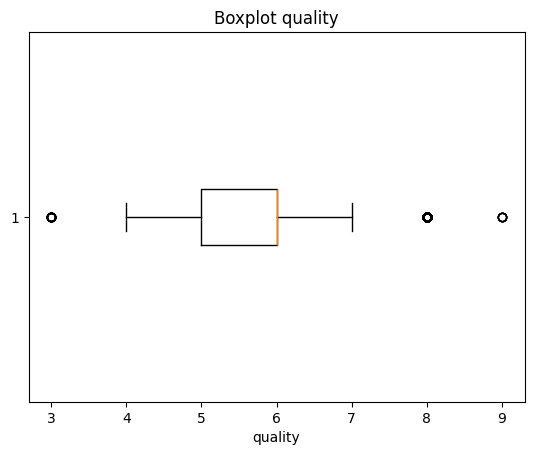

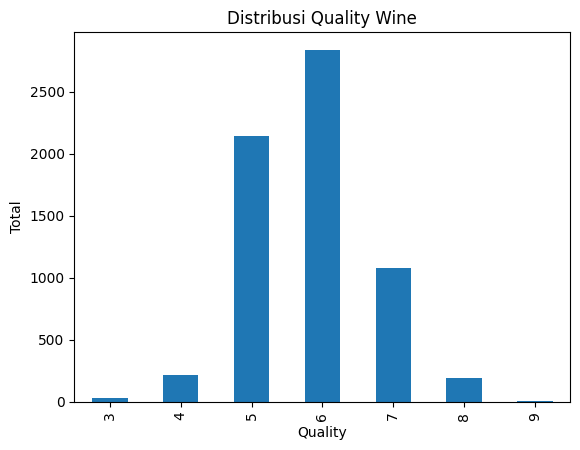

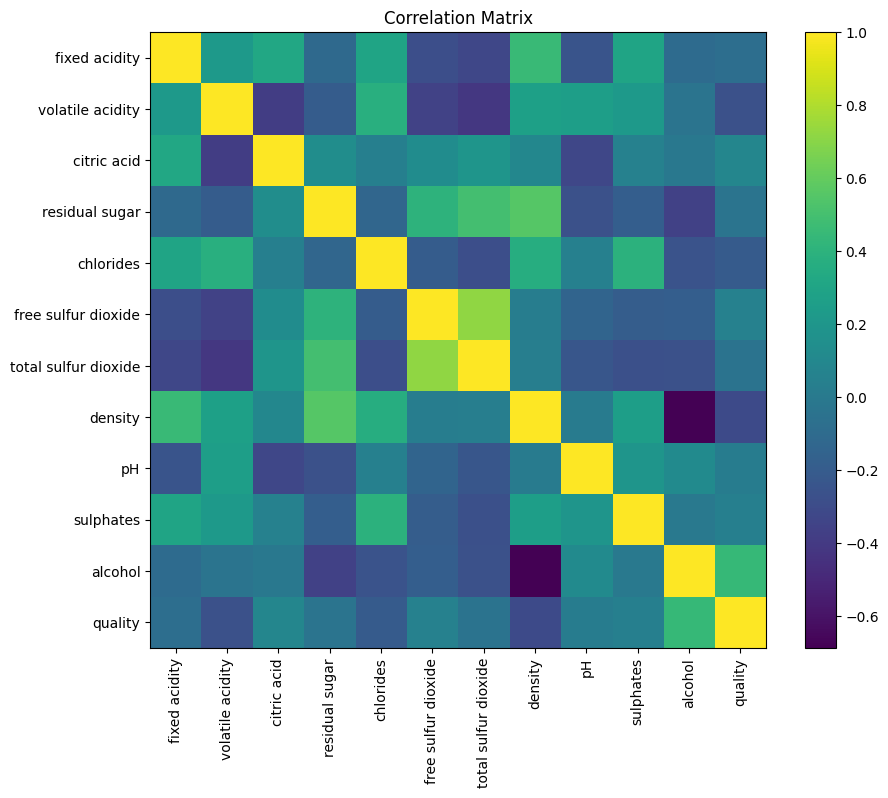

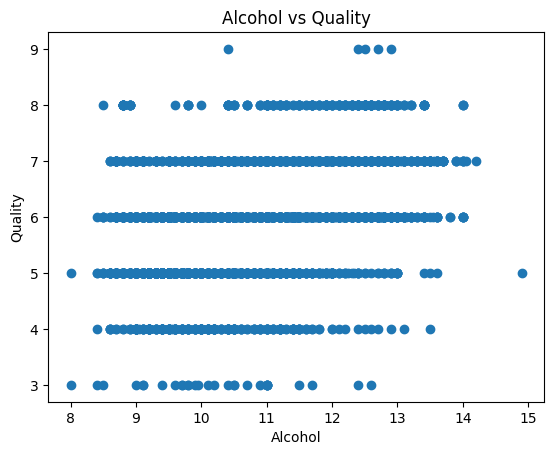

Skewness:
fixed acidity           1.722805
volatile acidity        1.495512
citric acid             0.473032
residual sugar          1.435000
chlorides               5.399849
free sulfur dioxide     1.220066
total sulfur dioxide   -0.001177
density                 0.503602
pH                      0.386966
sulphates               1.798467
alcohol                 0.565718
quality                 0.189623
dtype: float64


In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import math
# Load dataset
df = pd.read_csv("winequalityN.csv")

# Show Head
print(df.head())

# Print Table Size & Type
print("Shape:", df.shape)
df.info()

# Data Checking
print(df.isnull().sum())
df.describe()
df['type'].value_counts().plot(kind='bar')
plt.title("Distribusi Tipe Wine")
plt.xlabel("Type")
plt.ylabel("Jumlah")
plt.show()

numerical_cols = df.select_dtypes(include='number').columns

for col in numerical_cols:
    plt.figure()
    df[col].hist(bins=30)
    plt.title(f"Distribusi {col}")
    plt.xlabel(col)
    plt.ylabel("Frequency")
    plt.show()

for col in numerical_cols:
    plt.figure()
    plt.boxplot(df[col], vert=False)
    plt.title(f"Boxplot {col}")
    plt.xlabel(col)
    plt.show()

df['quality'].value_counts().sort_index().plot(kind='bar')
plt.title("Distribusi Quality Wine")
plt.xlabel("Quality")
plt.ylabel("Total")
plt.show()

corr = df.corr(numeric_only=True)

plt.figure(figsize=(10, 8))
plt.imshow(corr)
plt.colorbar()
plt.xticks(range(len(corr.columns)), corr.columns, rotation=90)
plt.yticks(range(len(corr.columns)), corr.columns)
plt.title("Correlation Matrix")
plt.show()

plt.scatter(df['alcohol'], df['quality'])
plt.xlabel("Alcohol")
plt.ylabel("Quality")
plt.title("Alcohol vs Quality")
plt.show()

print("Skewness:")
print(df[numerical_cols].skew())

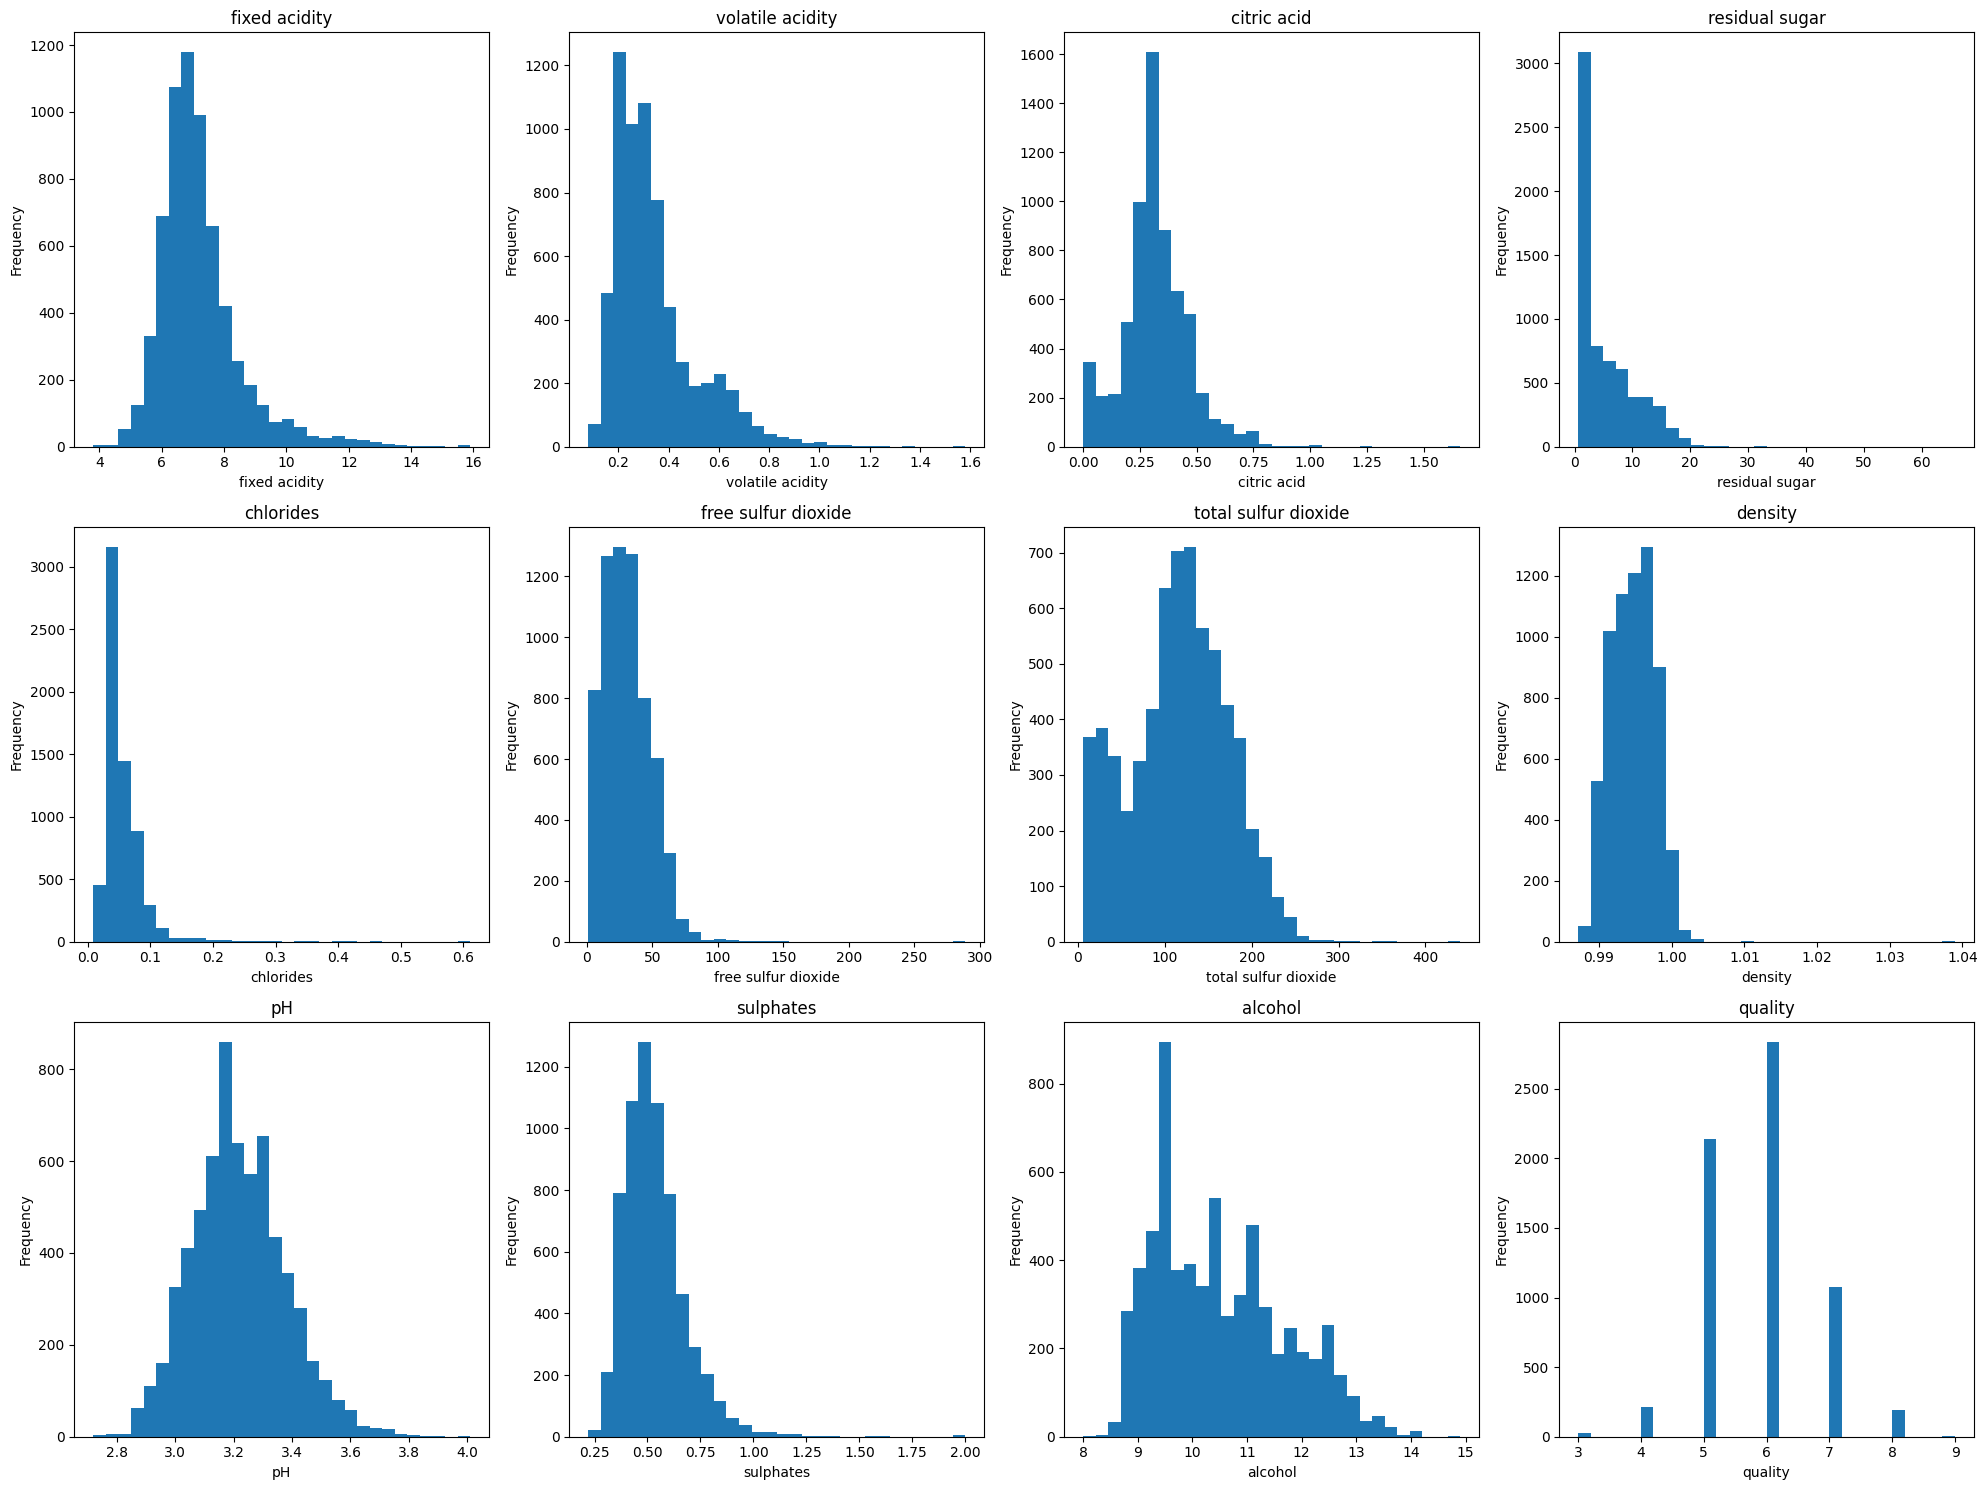

In [2]:
df = pd.read_csv("winequalityN.csv")

numerical_cols = df.select_dtypes(include='number').columns
n_features = len(numerical_cols)

n_cols = 4
n_rows = math.ceil(n_features / n_cols)

fig, axes = plt.subplots(n_rows, n_cols, figsize=(20, 15))
axes = axes.flatten()

for i, col in enumerate(numerical_cols):
    axes[i].hist(df[col], bins=30)
    axes[i].set_title(col)
    axes[i].set_xlabel(col)
    axes[i].set_ylabel("Frequency")

for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()


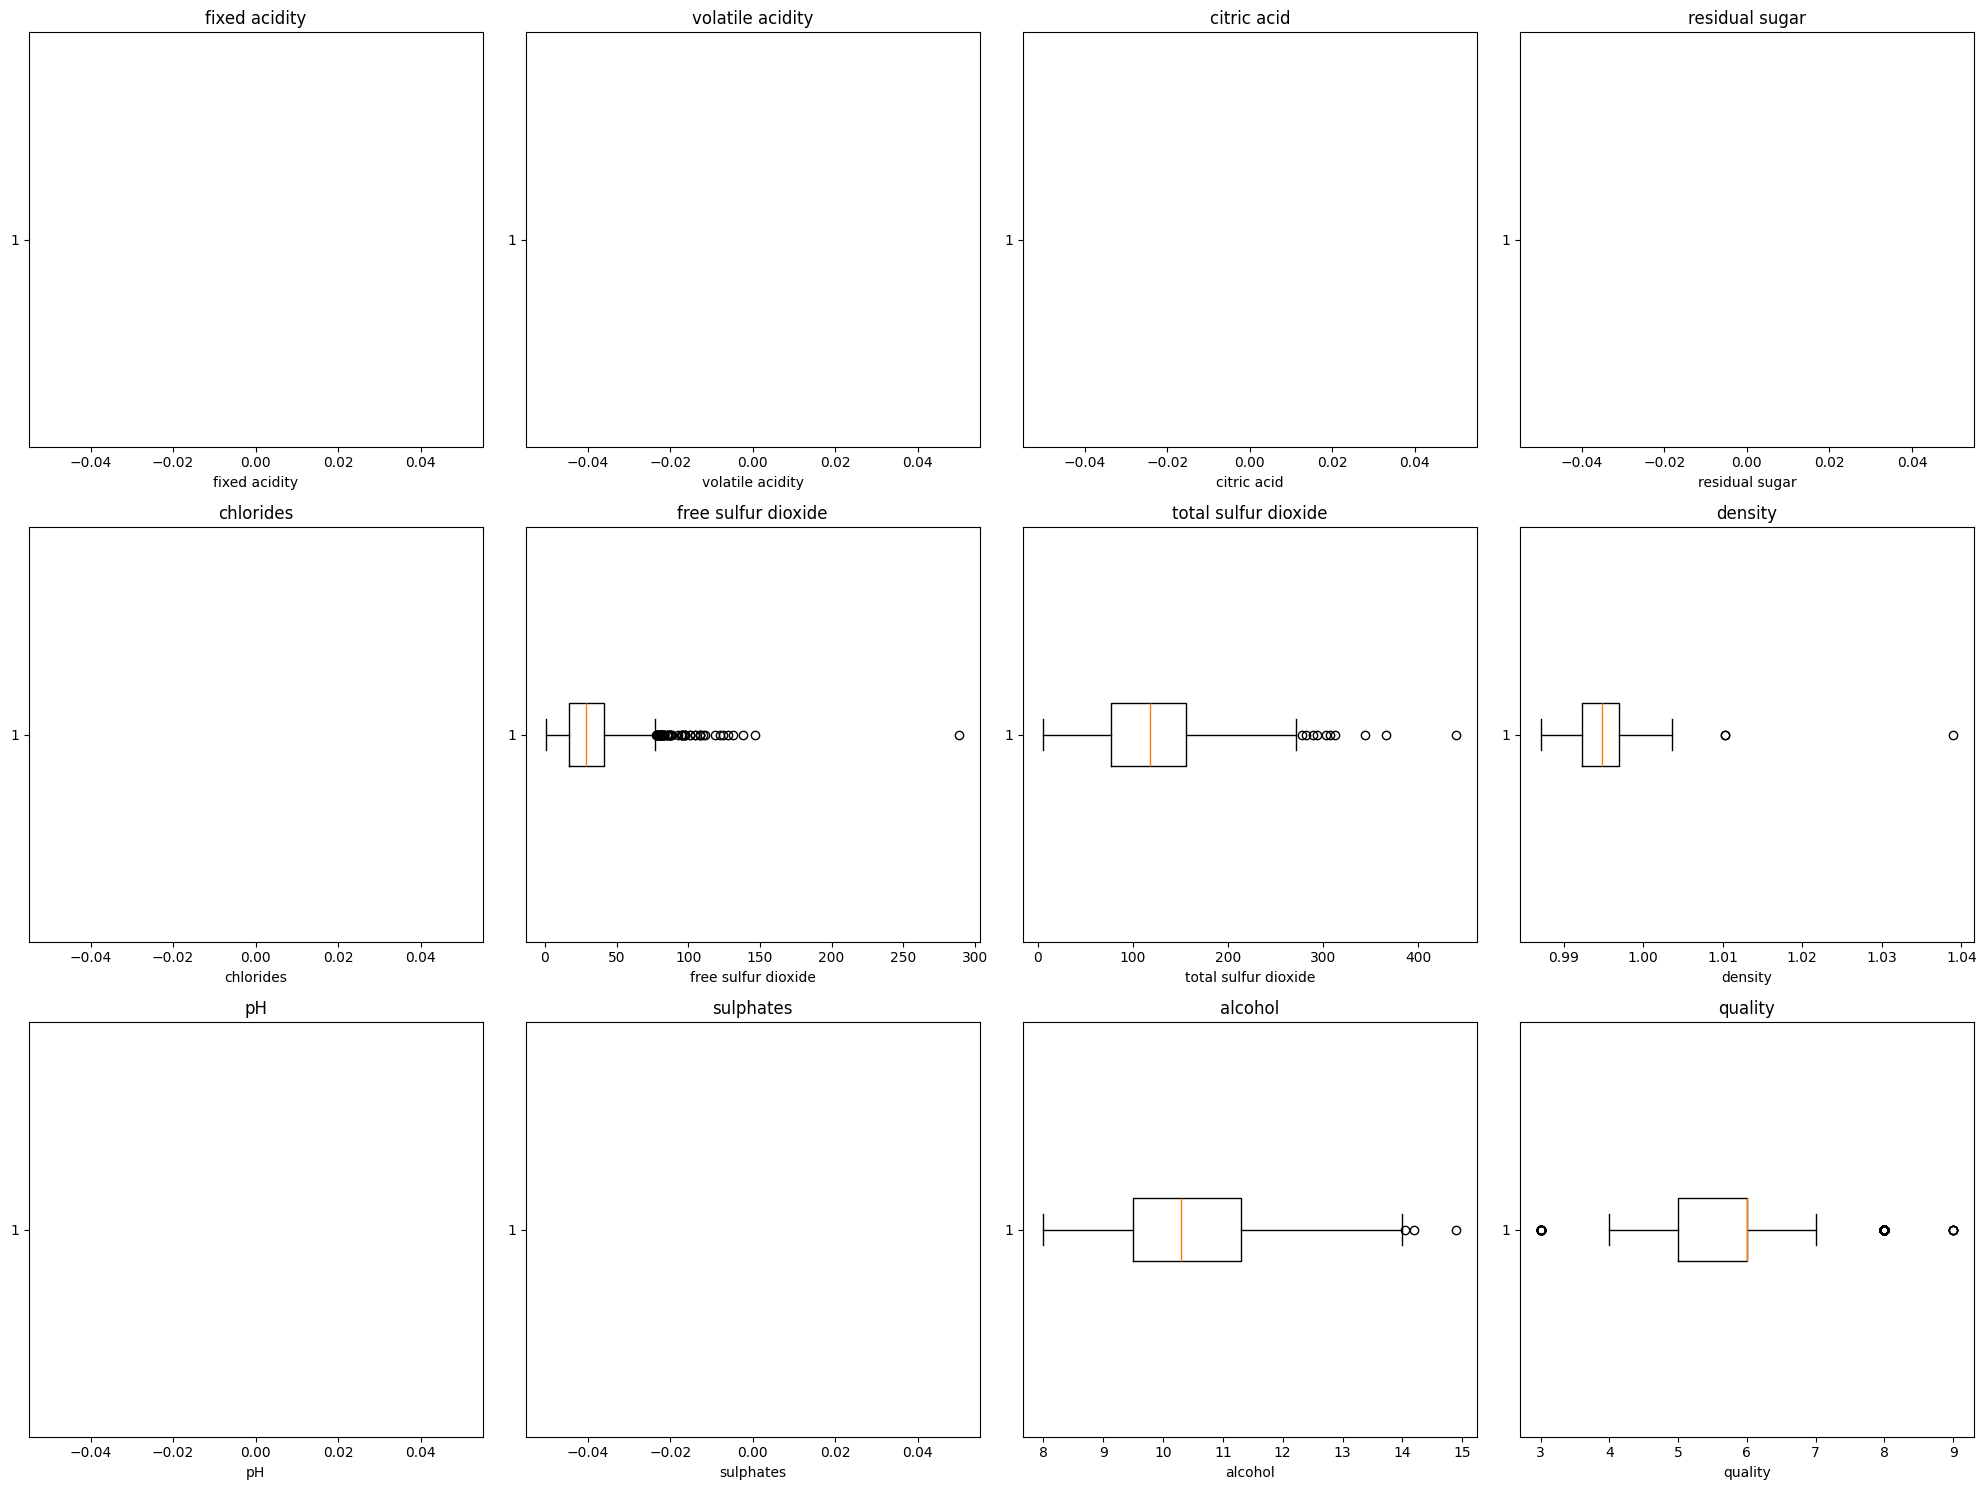

In [3]:
fig, axes = plt.subplots(n_rows, n_cols, figsize=(20, 15))
axes = axes.flatten()

for i, col in enumerate(numerical_cols):
    axes[i].boxplot(df[col], vert=False)
    axes[i].set_title(col)
    axes[i].set_xlabel(col)

for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()


In [4]:
df = pd.read_csv("winequalityN.csv")

numerical_cols = df.select_dtypes(include='number')

StatisticDescriptive = numerical_cols.describe().T

StatisticDescriptive = StatisticDescriptive.round(2)

print(StatisticDescriptive)

StatisticDescriptive.to_csv("StatisticDescriptiveN.csv")

                       count    mean    std   min    25%     50%     75%  \
fixed acidity         6487.0    7.22   1.30  3.80   6.40    7.00    7.70   
volatile acidity      6489.0    0.34   0.16  0.08   0.23    0.29    0.40   
citric acid           6494.0    0.32   0.15  0.00   0.25    0.31    0.39   
residual sugar        6495.0    5.44   4.76  0.60   1.80    3.00    8.10   
chlorides             6495.0    0.06   0.04  0.01   0.04    0.05    0.06   
free sulfur dioxide   6497.0   30.53  17.75  1.00  17.00   29.00   41.00   
total sulfur dioxide  6497.0  115.74  56.52  6.00  77.00  118.00  156.00   
density               6497.0    0.99   0.00  0.99   0.99    0.99    1.00   
pH                    6488.0    3.22   0.16  2.72   3.11    3.21    3.32   
sulphates             6493.0    0.53   0.15  0.22   0.43    0.51    0.60   
alcohol               6497.0   10.49   1.19  8.00   9.50   10.30   11.30   
quality               6497.0    5.82   0.87  3.00   5.00    6.00    6.00   

           